<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Hypothesis Testing and Z-tests (Part I)
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 2: Topic 13</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### Statistical hypothesis Testing: general framework
- Make a proposition about the world.
    - That proposition or *hypothesis* must make a claim about the parameters of a population or a set of populations.
    


If above not satisfied: 
- not really a question that can be answered with data acquisition/experimentation.

#### Examples

- Hypothesis: the mass of the southern Koalas is larger than that of the northern Koala. Yes or no?

<center><img src = "Images/southnorthkoala.jpg" width = 400 /></center>
<center>Freak coincidence or example of real difference?</center>

- CBD helps reduce anxiety. Yes or no?
<br><br>
    <center><img src = "Images/hemp.jpg" width = 400 /></center>


How do I make this statement more precise?


- What do I measure?
    - Questionnaire/survey?
    - Cortisol levels?
- Whats the population(s)?

**Experimental design**: We'll get into all this more during A/B testing. 

*More precise formulation*:

The level of cortisol levels in humans treated with CBD is, on average, lower than those who have not undergone treatment. 

Yes or no?

- This peak is not noise. True or false?

<center><img src = "Images/peakvsnoise.jpg" width = 400 /></center>
<center>Real peak or fluctuation associated with noise?</center>

Compare the peak value with the statistics of the noise floor (our population).

#### Role of Hypothesis in Data Science



- Conducting User Experience (UX) trials of websites/data products.

<center><img src = "Images/UX.jpg" width = 500 /></center>


Two sets of users drawn randomly:

- Give survey or measure engagement by click rate or site visits

**Hypothesis**: (Metric for user engagement) is higher for users who used version B vs version A. 

- Yes or no?

#### Other reasons for hypothesis testing in data science

- We get data. Want to pump it into a predictive Machine Learning model.
- But, may want to understand the *structure* of the data first.

#### What does structure mean?

- Are there meaningful groupings in the data?
    - Difference in the survival rate on the Titanic based on sex? 
    - Based on sex and class?
    

<center><img src = "Images/titanic.jpg" width = 300 /></center>
<center> <i>Titanic</i> <center>


- Does the age of a given group in our data follow a normal distribution?

Can certainly use visual exploratory data analysis:
- But also may want to or *need* to construct a rigorous hypothesis tests.
- Particularly in datasets that are a sample of a much larger population.

In [7]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import choice
height_list = norm.rvs(loc = 80, scale = 30, size = 150)


- E.g., is this data of heights drawn from a population with a normal distribution or not? 


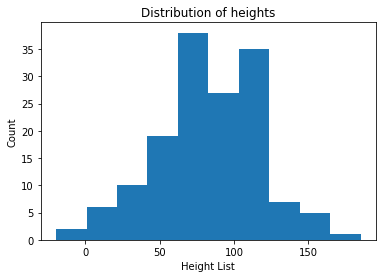

In [8]:
plt.hist(height_list)
plt.ylabel('Count')
plt.xlabel('Height List')
plt.title('Distribution of heights')
plt.show()

May want to have a rigorous test in the face of ambiguity.

#### The actual flow of hypothesis testing

1. State null and alternative hypthesis
2. Specify significance level ($\alpha$)
3. Calculate test statistic (e.g., z-statistic)
4. Calculate p-value
5. Interpret p-value (reject or fail to reject the null hypothesis)


#### Step 1: State null hypothesis and the alternative hypothesis

All our proposals and questions asked in a specific way.

Management decided to change site from version A to B.

- Site visit frequency/day higher for users who used version B vs version A. 
- Yes or No?

- **Null hypothesis** = No: $H_0$
- **Alternative hypothesis** = Yes: $H_a$

Now we assume for *hypothesis test* that the null is true.

- Ask how probable is the new visit frequency given that the null is true?


- Collect data of site visit frequency on website with version B.

- How probable is the new frequency that the null is true?
    - I.e. how probable is the new frequency given drawn from website with version A (no change)?
    - We have population data or a distribution for version A.

- We have population data or a distribution for version A.
    - How *probable* is the new mean site visit frequency (or greater than this) **under assumption version A is still in comission**
    - Call this p-value


#### Step 2. Specify significance level ($\alpha$)

Set a threshold for rejecting $H_0$:
- *Probability* new mean site visit frequency (or greater than this) **under assumption version A is still in comission**
- Less than $\alpha$

I.e.:

p-value < $\alpha$:
- Then reject the null.

For sampling distribution of mean (normal):

<center><img src = "Images/siglevel.png" width = 500 /></center>
<center> <i>Significance level</i> <center>

#### Our case:

$ \alpha = 0.05 $ arbitrary but standard in many communities.

So $ p \leq 0.05 $ reject the null.

#### Step 3. Calculate test statistic

- The test statistic here would be:
    - the mean of our sample OR
    - mean shifted/rescaled to population mean/standard deviation (Z-statistic)

In [9]:
from scipy.stats import poisson
populationA_visits_per_day = poisson.rvs(mu = 2, size = 500000)
populationB_visits_per_day = poisson.rvs(mu = 2.2, size = 200)

popA = pd.DataFrame({'visits/day': populationA_visits_per_day })
popB = pd.DataFrame({'visits/day': populationB_visits_per_day })

#### Have a lot of data for visits per day before site change:

In [32]:
popA.head()

,visits/day
0,3
1,1
2,1
3,4
4,4


In [33]:
popA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   visits/day  500000 non-null  int32
dtypes: int32(1)
memory usage: 1.9 MB


#### Plot histogram of population data:


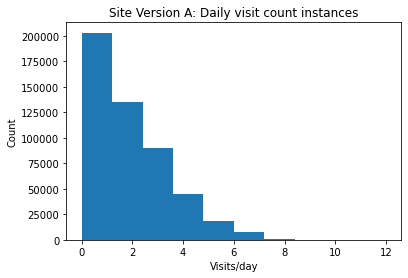

In [10]:
plt.hist(popA['visits/day'])
plt.ylabel('Count')
plt.xlabel('Visits/day')
plt.title('Site Version A: Daily visit count instances')
plt.show()

Clearly, not normally distributed:

In [34]:
# Have mean:
popA.mean()

visits/day    1.999188
dtype: float64

In [35]:
# Has standard deviation:
popA.std()

visits/day    1.412736
dtype: float64

Now we have our sample of site visits after rollout of site B:

In [36]:
popB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   visits/day  200 non-null    int32
dtypes: int32(1)
memory usage: 928.0 bytes


In [37]:
popB.mean()

visits/day    2.235
dtype: float64

Probability of mean of population B given:
- **Null hypothesis**:
    - statistics of mean of samples 
    - drawn from site visit frequency for site A 
    - with size N = 200:

I.e. is this sample mean possible if I drew samples of user interactions with previous site?

Look at the distribution of means with N = 200 assuming null:

In [15]:
num_trials = 100000

Nsample_trial_list =  [choice(popA['visits/day'], size = 200 ).mean() for trials in range(num_trials)]    

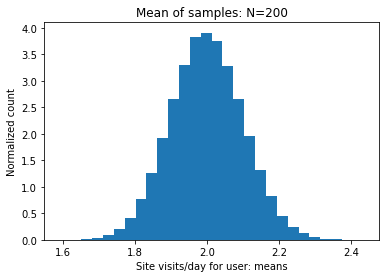

In [31]:
plt.hist(Nsample_trial_list, bins = 28, density = True)
plt.xlabel('Site visits/day for user: means')
plt.ylabel('Normalized count')
plt.title('Mean of samples: N=200')
plt.show()

In [17]:
x_range = np.linspace(1.5,2.5, 100)
mu = popA['visits/day'].mean()
samplemean_std = popA['visits/day'].std() / np.sqrt(200)
Y_n = norm.pdf(x_range, loc = popA['visits/day'].mean(), scale = samplemean_std)

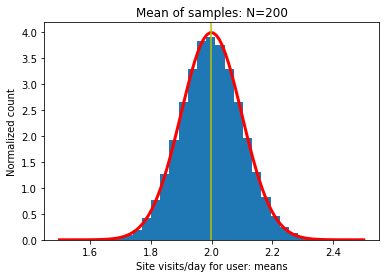

In [18]:
plt.hist(Nsample_trial_list, bins = 28, density = True)
plt.plot(x_range, Y_n, c ='r', linewidth = 3)
plt.axvline(popA['visits/day'].mean(), c = 'y' )
plt.title('Mean of samples: N=200')
plt.xlabel('Site visits/day for user: means')
plt.ylabel('Normalized count')
plt.show()

Or we rescale this entire distribution:

$$ \frac{(\bar{X} - \mu)}{\sigma/\sqrt{n}} $$

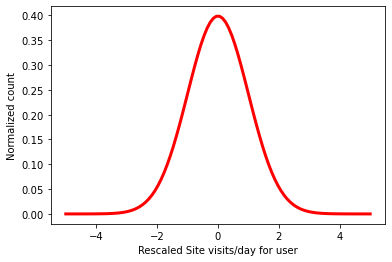

In [19]:
x_scaled = np.linspace(-5,5,100)
Y_scaled = norm.pdf(x_scaled, loc = 0, scale = 1)
plt.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
plt.xlabel('Rescaled Site visits/day for user')
plt.ylabel('Normalized count')
plt.show()

Computing Z-statistic for our sample:
 $$ \frac{\bar{X}_B - \mu}{\sigma/\sqrt{N}} $$
 
Puts on same scale as this standardized normal representing distribution of scaled sampling means. 
- Under assumption population mean $\mu$ and  $\sigma$ drawn from population A (null).



In [20]:
popA['visits/day'].mean()

1.999188

In [21]:
popA['visits/day'].std()

1.4127361155924332

In general, testing statistic

could be any aggregation built from our sample:

- variance
- some function of the mean, etc.

May follow different test distribution than normal.

In [39]:
N = 200
Z_score = (popB.mean() - popA.mean())/(popA.std()/np.sqrt(N))
Z_score[0]

2.360586134166148

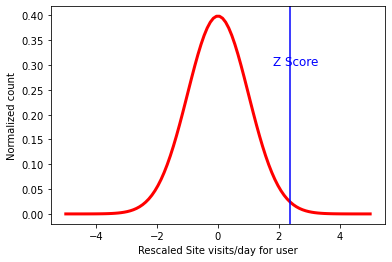

In [23]:
x_scaled = np.linspace(-5,5,100)
Y_scaled = norm.pdf(x_scaled, loc = 0, scale = 1)
plt.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
plt.axvline(Z_score[0], c = 'b')
plt.annotate('Z Score', xy = (1.8,.3), fontsize=12, c ='b' )
plt.xlabel('Rescaled Site visits/day for user')
plt.ylabel('Normalized count')
plt.show()

#### Step 4. Calculate p-value

How probable is the test statistic of sample or more extreme:
- given distribution of statistic assuming null is true?

- Calculate it:
    - This is p-value.


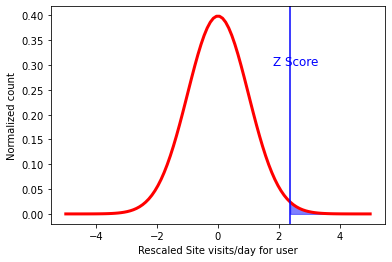

In [24]:
x_scaled = np.linspace(-5,5,100)
Y_scaled = norm.pdf(x_scaled, loc = 0, scale = 1)
plt.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
plt.axvline(Z_score[0], c = 'b')
plt.fill_between(x_scaled, Y_scaled, where = (Z_score[0] < x_scaled), alpha = 0.5, color='b')
plt.annotate('Z Score', xy = (1.8,.3), fontsize=12, c ='b' )
plt.xlabel('Rescaled Site visits/day for user')
plt.ylabel('Normalized count')
plt.show()

The p-value is shaded area under the curve.

Can calculate using survival function on standardized normal with mean 0 and std 1:

In [40]:
p_value = norm.sf(Z_score[0], loc = 0, scale = 1)
p_value

0.009123040283640237

#### 5. Interpret p-value (reject or fail to reject the null hypothesis)

Is $ p \leq \alpha $ ?

- If so, reject the null.
- If not, cannot reject the null.

Here we stated that $ \alpha = 0.05 $.

In [41]:
p_value = norm.sf(Z_score[0], loc = 0, scale = 1)
p_value

0.009123040283640237

Do we accept or reject $H_0$?

We reject $H_0$: 
- our sample mean from site B is larger in a way not consistent with population sampling from site A.

### Effect of sampling size:
- Now N = 25 for user sample using Site B.
    

In [27]:
smaller_sample = poisson.rvs(mu = 2.2, size = 25)


In [44]:
smaller_sample

array([1, 2, 1, 2, 0, 2, 3, 4, 2, 2, 4, 5, 1, 0, 1, 4, 3, 0, 2, 0, 6, 3,
       1, 4, 2])

In [45]:
smaller_sample.mean()

2.2

Compute Z statistic for smaller sample:

In [47]:
N = 25
Z_score_smaller_sample = (smaller_sample.mean() - popA.mean())/(popA.std()/np.sqrt(N))
Z_score_smaller_sample 

visits/day    0.71072
dtype: float64

Compute p-value:

In [48]:
p_value = norm.sf(Z_score_smaller_sample[0], loc = 0, scale = 1)
p_value

0.23862884053147704

Do we reject at significance level $\alpha$ = 0.05?

Sample size matters when testing hypotheses on statistics!

**Next up**

Talk about the different types of Z-tests:
- When to use them

Similar logic will extend to t-tests.